In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
display(df.head())
print(df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
print(f"Valores Nulos:\n{df.isnull().sum()}")
print(f"\nDuplicados: {df.duplicated().sum()}")

Valores Nulos:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicados: 1


In [6]:
df.drop_duplicates(inplace=True)

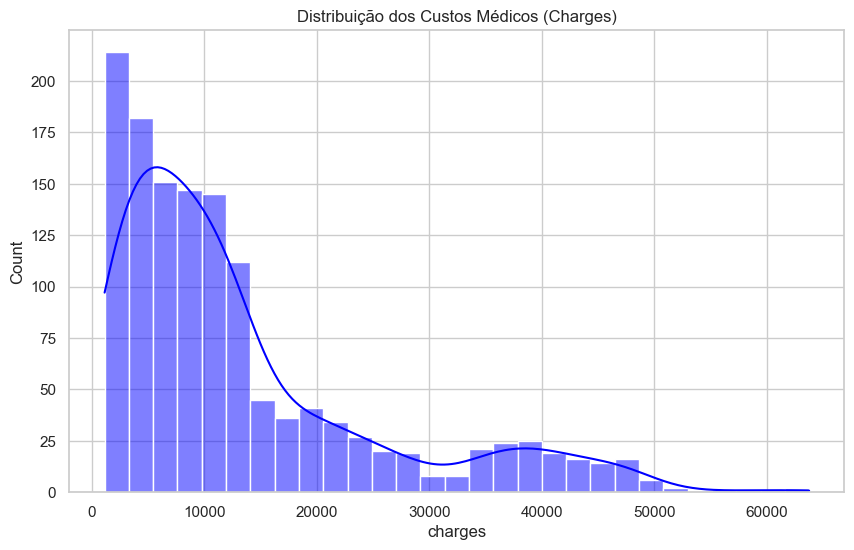

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribuição dos Custos Médicos (Charges)')
plt.show()

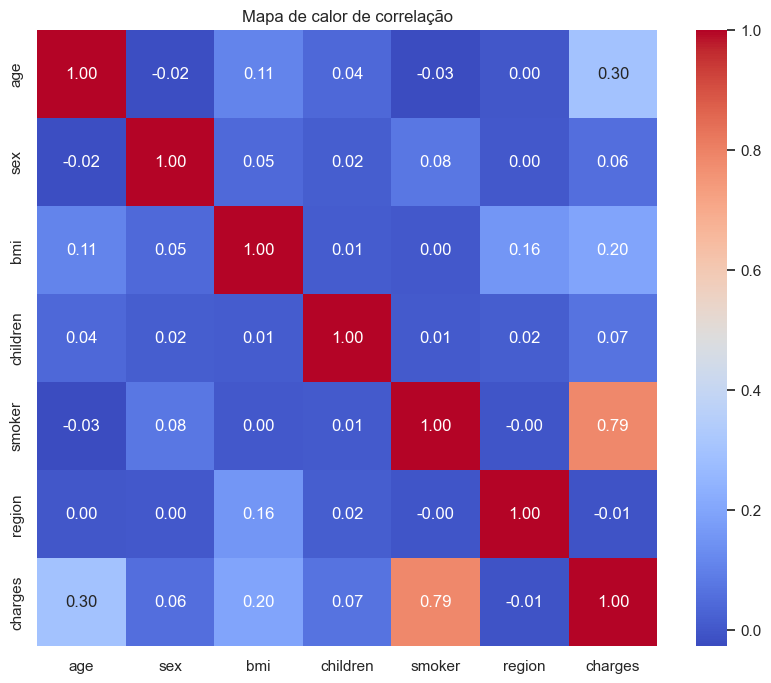

In [8]:
df_corr = df.copy()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlação')
plt.show()

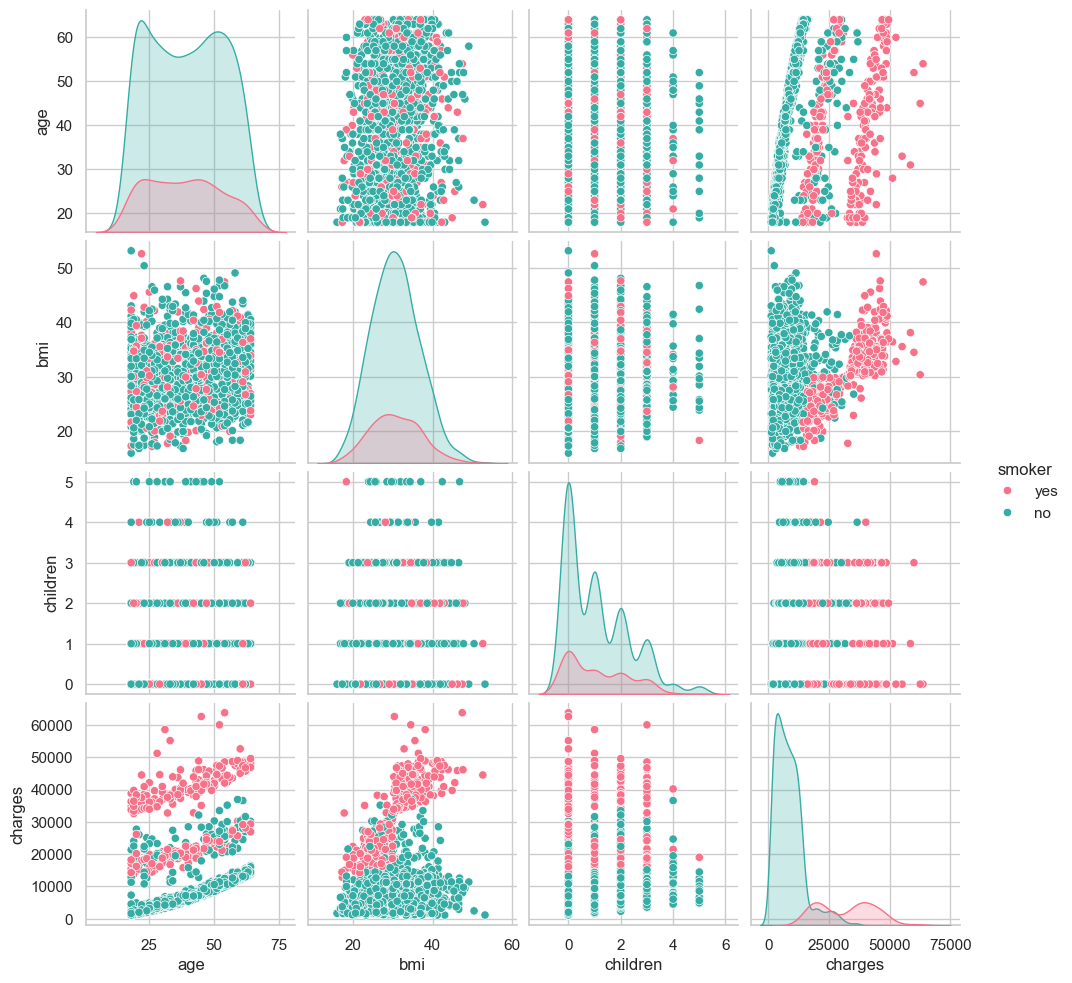

In [9]:
sns.pairplot(df, hue='smoker', palette='husl')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
display(df_encoded.head())
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do treino: {X_train.shape}')
print(f'Tamanho do teste: {X_test.shape}')

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Tamanho do treino: (1069, 8)
Tamanho do teste: (268, 8)


In [12]:
import statsmodels.api as sm

In [13]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train_sm = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_sm).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     358.1
Date:                Mon, 08 Dec 2025   Prob (F-statistic):          4.94e-295
Time:                        18:47:59   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1060   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.109e+04   1114.260  

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

print("--- Resultados Preliminares (R²) ---")
print(f"Linear Múltipla R²: {r2_score(y_test, y_pred_lr):.2f}")
print(f"Polinomial (grau 2) R²: {r2_score(y_test, y_pred_poly):.2f}")

--- Resultados Preliminares (R²) ---
Linear Múltipla R²: 0.81
Polinomial (grau 2) R²: 0.88


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [17]:
target_col = 'smoker_yes'
X_class = df_encoded.drop(columns=[target_col])
y_class = df_encoded[target_col]

In [18]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

In [20]:
modelos = {
    "Regressão Logística": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

results = []

for nome, modelo in modelos.items():
    
    modelo.fit(X_train_c, y_train_c)
    
    
    y_pred = modelo.predict(X_test_c)
    y_proba = modelo.predict_proba(X_test_c)[:, 1]
    
    
    acc = accuracy_score(y_test_c, y_pred)
    prec = precision_score(y_test_c, y_pred)
    rec = recall_score(y_test_c, y_pred)
    f1 = f1_score(y_test_c, y_pred)
    auc = roc_auc_score(y_test_c, y_proba)
    
    results.append({
        "Modelo": nome,
        "Acurácia": acc,
        "Precisão": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })
    
    
    print(f"--- {nome} ---")
    print(confusion_matrix(y_test_c, y_pred))
    print("-" * 30)


df_results = pd.DataFrame(results)
display(df_results)

--- Regressão Logística ---
[[203   5]
 [  4  56]]
------------------------------
--- Naive Bayes ---
[[200   8]
 [ 14  46]]
------------------------------


,Modelo,Acurácia,Precisão,Recall,F1-Score,AUC-ROC
0,Regressão Logística,0.966418,0.918033,0.933333,0.925620,0.993429
1,Naive Bayes,0.917910,0.851852,0.766667,0.807018,0.984936


In [21]:
from pycaret.regression import *

In [22]:
s = setup(data=df, target='charges', session_id=42,
          normalize=True,
          experiment_name='insurance_regression')

,Description,Value
0,Session id,42
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1337, 7)"
4,Transformed data shape,"(1337, 10)"
5,Transformed train set shape,"(935, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [23]:
best_model = compare_models(sort='R2')
print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2543.0958,21268038.6151,4581.1987,0.8397,0.4339,0.2980,0.0190
rf,Random Forest Regressor,2764.9785,24122288.5553,4873.9304,0.8187,0.4752,0.3417,0.0360
lightgbm,Light Gradient Boosting Machine,2880.7579,24044885.9495,4876.6243,0.8184,0.5230,0.3590,0.1590
ada,AdaBoost Regressor,3927.0252,25628726.4987,5035.2433,0.8056,0.5930,0.6547,0.0130
et,Extra Trees Regressor,2740.9634,26581043.6023,5120.6573,0.7998,0.4854,0.3327,0.0320
knn,K Neighbors Regressor,3484.9542,31369618.8000,5593.6668,0.7608,0.4879,0.3593,0.0120
br,Bayesian Ridge,4207.2694,36488909.2004,6022.3934,0.7231,0.5675,0.4243,0.0110
lar,Least Angle Regression,4204.3589,36488521.1729,6022.5834,0.7230,0.5836,0.4234,0.0090
llar,Lasso Least Angle Regression,4204.1262,36487524.1358,6022.4873,0.7230,0.5813,0.4234,0.0090
ridge,Ridge Regression,4205.3777,36488073.0026,6022.4680,0.7230,0.5758,0.4237,0.0090


GradientBoostingRegressor(random_state=42)


In [24]:
modelo_inicial = create_model('gbr')
modelo_otimizado = tune_model(modelo_inicial, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2714.0857,27491832.6656,5243.2655,0.8344,0.4615,0.2944
1,2301.6103,15525273.2463,3940.2123,0.8270,0.4069,0.3435
2,2840.6093,25605042.9711,5060.1426,0.8422,0.3900,0.2482
3,2565.4818,23385197.0723,4835.8243,0.8465,0.5332,0.3486
4,2779.7651,23653072.5630,4863.4425,0.7878,0.4708,0.2990
5,1997.7681,12210806.0735,3494.3964,0.8932,0.3856,0.2972
6,2444.6453,19919623.4951,4463.1405,0.8445,0.4232,0.2828
7,2454.7254,17435872.5850,4175.6284,0.8758,0.3757,0.2435
8,2707.1437,25405434.5483,5040.3804,0.7854,0.4822,0.2881


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2805.9657,27921021.9930,5284.0346,0.8319,0.4626,0.2933
1,2444.7966,16603165.8801,4074.6983,0.8150,0.4468,0.3838
2,3156.3143,27453927.9684,5239.6496,0.8308,0.4343,0.3072
3,2923.7588,25280509.9094,5027.9727,0.8340,0.6009,0.3828
4,2818.2941,24130808.0855,4912.3119,0.7836,0.4633,0.2934
5,2163.9507,13856401.7025,3722.4188,0.8788,0.4133,0.3008
6,2716.9344,22009070.1133,4691.3825,0.8282,0.4587,0.3525
7,2624.7602,18007056.2068,4243.4722,0.8717,0.3910,0.2759
8,2913.6793,27868946.0823,5279.1047,0.7646,0.5108,0.3392


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


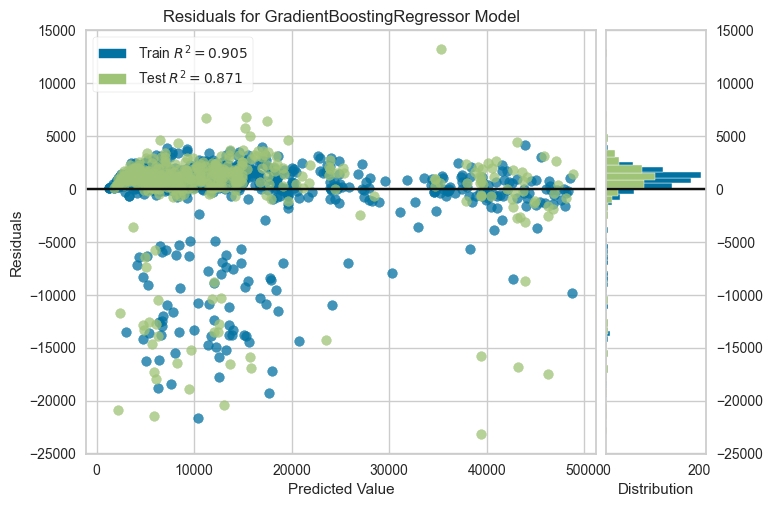

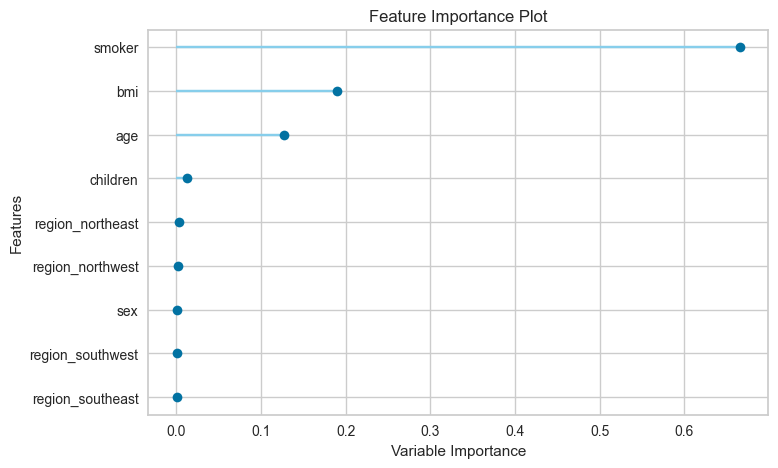

In [25]:
plot_model(modelo_otimizado, plot='residuals')
plot_model(modelo_otimizado, plot='feature')
final_model = finalize_model(modelo_otimizado)

In [26]:
save_model(final_model, 'modelo_insurance_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': no     0
 yes    1
 NaN   -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['region'],
    